## MAP - Charting Student Math Misunderstandings

---

### Dataset (train/test.csv)
- QuestionId: Unique question identifier
- QuestionText: The text of the question
- MC_Answer: The multiple-choice answer the student selected
- Student Explanation: A student's explanation for choosing a MC_Answer
- Category(train only): A classification of relationship between MC_Answer and Student Explanation
- Misconception(train only): Only applicable when Category contains a misconception, otherwise is NA

### Submission (sample_submission.csv)
- Category:Misconception: The predicted classification Category concatenated with Misconception by a colon

### 1. Data upload

In [1]:
import sys
from pathlib import Path

ROOT_DIR = Path().resolve().parent
sys.path.append(str(ROOT_DIR))

In [2]:
from src.data_load import load_train, load_test

train = load_train()
test = load_test()

print(train.head())
print(test.head())

   row_id  QuestionId                                       QuestionText  \
0       0       31772  What fraction of the shape is not shaded? Give...   
1       1       31772  What fraction of the shape is not shaded? Give...   
2       2       31772  What fraction of the shape is not shaded? Give...   
3       3       31772  What fraction of the shape is not shaded? Give...   
4       4       31772  What fraction of the shape is not shaded? Give...   

           MC_Answer                                 StudentExplanation  \
0  \( \frac{1}{3} \)                  0ne third is equal to tree nineth   
1  \( \frac{1}{3} \)  1 / 3 because 6 over 9 is 2 thirds and 1 third...   
2  \( \frac{1}{3} \)  1 3rd is half of 3 6th, so it is simplee to un...   
3  \( \frac{1}{3} \)        1 goes into everything and 3 goes into nine   
4  \( \frac{1}{3} \)                    1 out of every 3 isn't coloured   

       Category Misconception  
0  True_Correct           NaN  
1  True_Correct           Na

### 2. 기본

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rcParams

def set_korean_font():
    # 각 OS에서 쓸 수 있는 후보 폰트들
    candidates = [
        "AppleGothic",     # macOS
        "Malgun Gothic",   # Windows
        "NanumGothic",     # 리눅스/직접 설치
        "Nanum Gothic",
        "DejaVu Sans",
    ]

    available = {f.name for f in font_manager.fontManager.ttflist}

    for font in candidates:
        if font in available:
            rcParams["font.family"] = font
            rcParams["axes.unicode_minus"] = False
            print(f"[Font] Using font: {font}")
            break
    else:
        rcParams["axes.unicode_minus"] = False
        print("[Font] No Korean font found. Using default font.")

set_korean_font()

[Font] Using font: Malgun Gothic


In [3]:
print(train.info())
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36696 entries, 0 to 36695
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   row_id              36696 non-null  int64 
 1   QuestionId          36696 non-null  int64 
 2   QuestionText        36696 non-null  object
 3   MC_Answer           36696 non-null  object
 4   StudentExplanation  36696 non-null  object
 5   Category            36696 non-null  object
 6   Misconception       9860 non-null   object
dtypes: int64(2), object(5)
memory usage: 2.0+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   row_id              3 non-null      int64 
 1   QuestionId          3 non-null      int64 
 2   QuestionText        3 non-null      object
 3   MC_Answer           3 non-null      object
 4   StudentExpla

In [5]:
print(train.describe())
print(test.describe())

             row_id     QuestionId
count  36696.000000   36696.000000
mean   18347.500000   46356.825104
std    10593.367076   25617.723392
min        0.000000   31772.000000
25%     9173.750000   31777.000000
50%    18347.500000   32833.000000
75%    27521.250000   33474.000000
max    36695.000000  109465.000000
        row_id    QuestionId
count      3.0      3.000000
mean   36697.0  32126.333333
std        1.0    613.723336
min    36696.0  31772.000000
25%    36696.5  31772.000000
50%    36697.0  31772.000000
75%    36697.5  32303.500000
max    36698.0  32835.000000


In [21]:
train.columns.tolist()

['row_id',
 'QuestionId',
 'QuestionText',
 'MC_Answer',
 'StudentExplanation',
 'Category',
 'Misconception']

### 3. 결측치

In [4]:
train.isna().sum()

row_id                    0
QuestionId                0
QuestionText              0
MC_Answer                 0
StudentExplanation        0
Category                  0
Misconception         26836
dtype: int64

In [5]:
(train.isna().sum() / len(train)).round(3)

row_id                0.000
QuestionId            0.000
QuestionText          0.000
MC_Answer             0.000
StudentExplanation    0.000
Category              0.000
Misconception         0.731
dtype: float64

### 4. Category 분포 EDA

In [8]:
# Category 값 종류, 개수
train["Category"].value_counts()

Category
True_Correct           14802
False_Misconception     9457
False_Neither           6542
True_Neither            5265
True_Misconception       403
False_Correct            227
Name: count, dtype: int64

In [7]:
train["Category"].value_counts(normalize=True).round(3)

Category
True_Correct           0.403
False_Misconception    0.258
False_Neither          0.178
True_Neither           0.143
True_Misconception     0.011
False_Correct          0.006
Name: proportion, dtype: float64

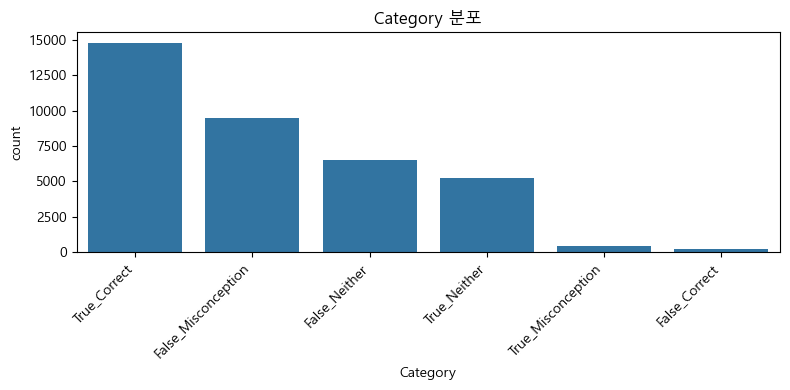

In [30]:
plt.figure()
sns.countplot(data=train, x="Category", order=train["Category"].value_counts().index)
plt.xticks(rotation=45, ha="right")
plt.title("Category 분포")
plt.tight_layout()
plt.show()

### 5. Misconception 분포 EDA

In [15]:
# Misconception 값 종류

train["Misconception"].value_counts().head(20)

Misconception
Incomplete                 1454
Additive                    929
Duplication                 704
Subtraction                 620
Positive                    566
Wrong_term                  558
Irrelevant                  497
Wrong_fraction              418
Inversion                   414
Mult                        353
Denominator-only_change     336
Whole_numbers_larger        329
Adding_across               307
WNB                         299
Tacking                     290
Unknowable                  282
Wrong_Fraction              273
SwapDividend                206
Scale                       179
Not_variable                154
Name: count, dtype: int64

In [13]:
misconception_counts = train["Misconception"].value_counts()
print("유니크 오개념 개수:", misconception_counts.shape[0])
misconception_counts.head(20)

유니크 오개념 개수: 35


Misconception
Incomplete                 1454
Additive                    929
Duplication                 704
Subtraction                 620
Positive                    566
Wrong_term                  558
Irrelevant                  497
Wrong_fraction              418
Inversion                   414
Mult                        353
Denominator-only_change     336
Whole_numbers_larger        329
Adding_across               307
WNB                         299
Tacking                     290
Unknowable                  282
Wrong_Fraction              273
SwapDividend                206
Scale                       179
Not_variable                154
Name: count, dtype: int64

In [16]:
# NA vs Non-NA 비율

misconception_na_ratio = train["Misconception"].isna().mean()
print("Misconception NA 비율:", round(misconception_na_ratio, 3))

Misconception NA 비율: 0.731


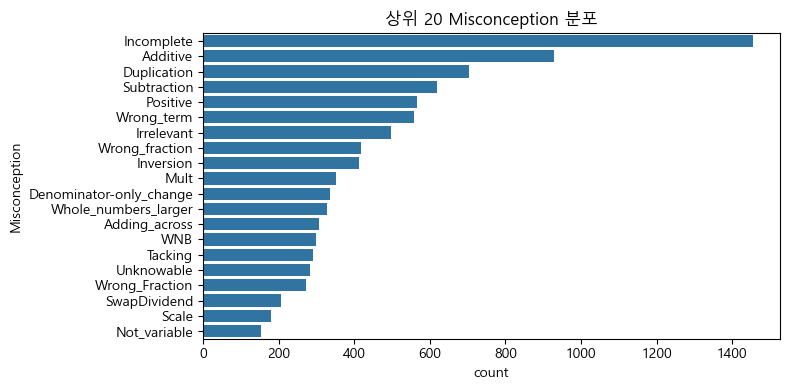

In [31]:
# Non-NA만 분포

mc_non_na = train[~train["Misconception"].isna()]

plt.figure()
top_n = 20
sns.countplot(
    data=mc_non_na,
    y="Misconception",
    order=mc_non_na["Misconception"].value_counts().head(top_n).index
)
plt.title(f"상위 {top_n} Misconception 분포")
plt.tight_layout()
plt.show()

### 6. Category vs Misconception 관계

In [18]:
pd.crosstab(train["Category"], train["Misconception"].isna()).rename(
    columns={True: "Misconception_NA", False: "Misconception_NotNA"}
)

Misconception,Misconception_NotNA,Misconception_NA
Category,,
False_Correct,0,227
False_Misconception,9457,0
False_Neither,0,6542
True_Correct,0,14802
True_Misconception,403,0
True_Neither,0,5265


In [19]:
crosstab = pd.crosstab(train["Category"], train["Misconception"].isna(), normalize="index")
crosstab

Misconception,False,True
Category,,
False_Correct,0.0,1.0
False_Misconception,1.0,0.0
False_Neither,0.0,1.0
True_Correct,0.0,1.0
True_Misconception,1.0,0.0
True_Neither,0.0,1.0


### 7. 텍스트 길이 분석

In [36]:
# Student Explanation

train["exp_len"] = train["StudentExplanation"].astype(str).str.len()
test["exp_len"] = test["StudentExplanation"].astype(str).str.len()

train["exp_len"].describe()

count    36696.000000
mean        70.000245
std         38.695627
min          1.000000
25%         43.000000
50%         60.000000
75%         86.000000
max        586.000000
Name: exp_len, dtype: float64

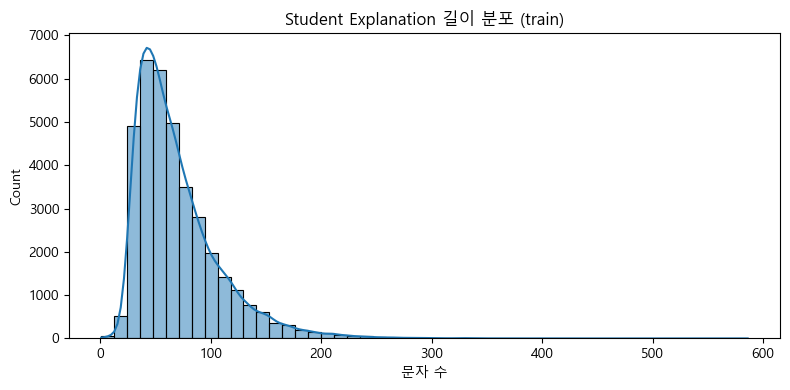

In [32]:
plt.figure()
sns.histplot(train["exp_len"], bins=50, kde=True)
plt.title("Student Explanation 길이 분포 (train)")
plt.xlabel("문자 수")
plt.tight_layout()
plt.show()

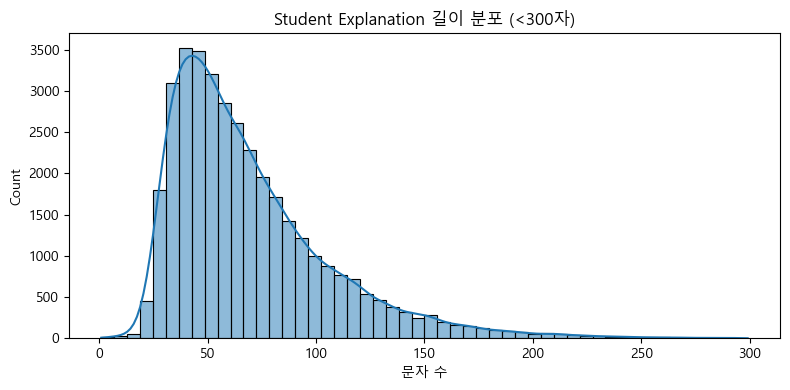

In [33]:
plt.figure()
sns.histplot(train[train["exp_len"] < 300]["exp_len"], bins=50, kde=True)
plt.title("Student Explanation 길이 분포 (<300자)")
plt.xlabel("문자 수")
plt.tight_layout()
plt.show()

In [37]:
# Question Text

train["question_len"] = train["QuestionText"].astype(str).str.len()
train["question_len"].describe()

count    36696.000000
mean        97.786734
std         66.218822
min         29.000000
25%         36.000000
50%         62.000000
75%        160.000000
max        226.000000
Name: question_len, dtype: float64

In [38]:
# Student Explanation, Question Text 상관관계

train[["exp_len", "question_len"]].corr()

,exp_len,question_len
exp_len,1.00000,-0.03805
question_len,-0.03805,1.00000


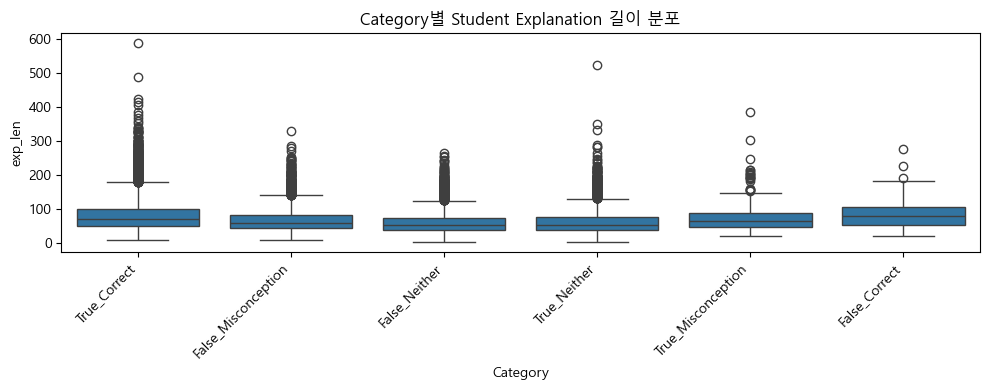

In [39]:
# Category 별 설명 길이 분포

plt.figure(figsize=(10, 4))
order = train["Category"].value_counts().index

sns.boxplot(
    data=train,
    x="Category",
    y="exp_len",
    order=order
)
plt.xticks(rotation=45, ha="right")
plt.title("Category별 Student Explanation 길이 분포")
plt.tight_layout()
plt.show()

In [40]:
# Misconception 있는 샘플만 따로 길이 분포

has_mc = train[~train["Misconception"].isna()].copy()
has_mc["exp_len"].describe()

count    9860.000000
mean       66.655882
std        32.799652
min         9.000000
25%        43.000000
50%        59.000000
75%        82.000000
max       385.000000
Name: exp_len, dtype: float64

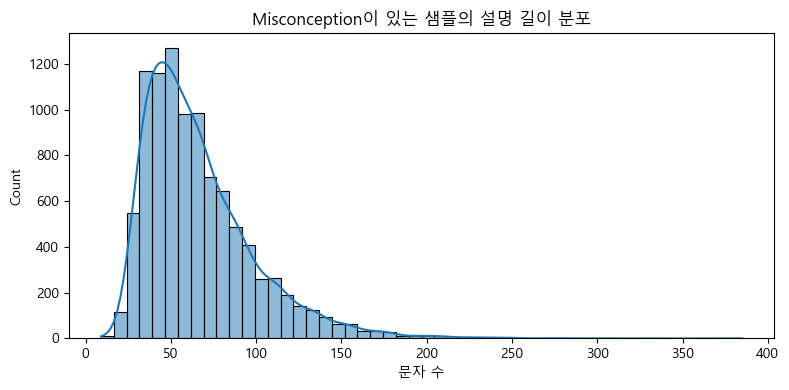

In [41]:
plt.figure()
sns.histplot(has_mc["exp_len"], bins=50, kde=True)
plt.title("Misconception이 있는 샘플의 설명 길이 분포")
plt.xlabel("문자 수")
plt.tight_layout()
plt.show()